<a href="https://colab.research.google.com/github/bruckman/Gamma_Factory/blob/main/2D_marginal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

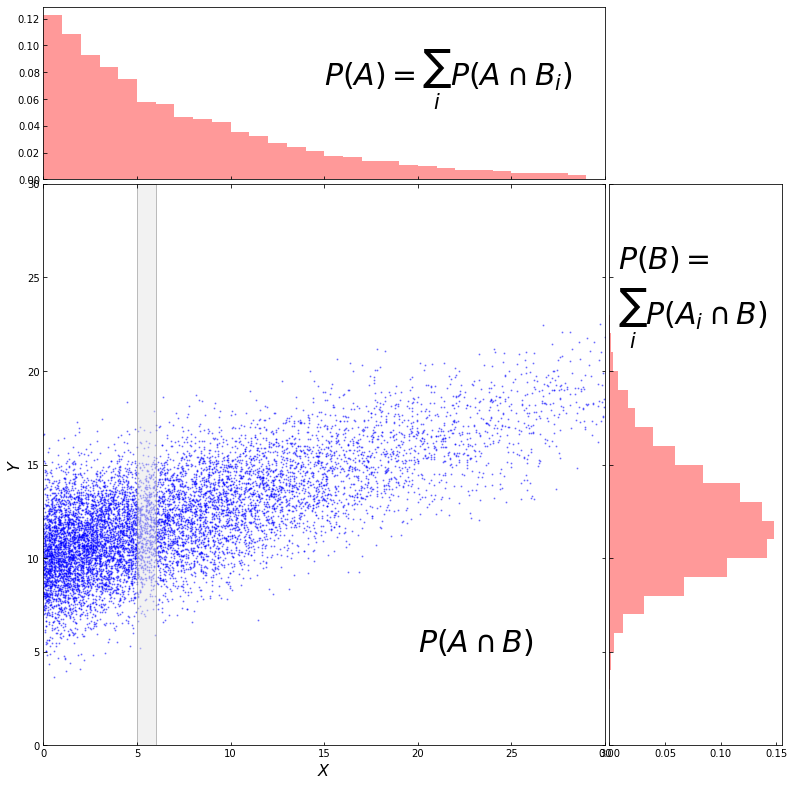

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Fixing random state for reproducibility
np.random.seed(19680801)

def gauss(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))

def decay(x, tau):
    return np.exp(-x/tau) / tau

xlow = 0
xhig = 30
sscale = 10
mu = 10
sigma = 2.0
tau = 8.0

N = 10000
nlin = 1000
# the random data
x = np.linspace(xlow, xhig, nlin)
#y = np.linspace(xlow, xhig, nlin)
xx = decay(x, tau)
yy = gauss(x, mu, sigma)

normx = 0
for k in xx:
  normx = normx + k

normy = 0
for k in yy:
  normy = normy + k

  
xxx0 = np.random.choice(x, N, p=xx/normx)
yyy0 = np.random.choice(x, N, p=yy/normy)


# transformation:
delta = 0.0
x0 =  xxx0
y0 =  yyy0 +xxx0*0.3


# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# set up a figure
fig = plt.figure(figsize=(12,12))


ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x0, y0, s=1.0, color='blue', alpha=0.4)

#cf = np.cos(kappa*np.pi)*np.cos(kappa*np.pi)-np.sin(kappa*np.pi)*np.sin(kappa*np.pi)
#ax_scatter.text(0, 3.5, r"$\rho = %f$"%(cf,),horizontalalignment='center', fontsize=25)
#ax_scatter.text(0, 3.5, r"$\rho = %.2f$"%(rho,),horizontalalignment='center', fontsize=25)

# now determine nice limits by hand:
binwidth = 1.0
#lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((xlow, xhig))
ax_scatter.set_ylim((xlow, xhig))

# Make the shaded region
verts = [(5, 0), (5,30), (6,30),(6, 0)]
poly = Polygon(verts, closed=True, facecolor='0.9', edgecolor='0.5', alpha=0.5)
ax_scatter.add_patch(poly)

ax_scatter.text(20, 5, r"$P(A\cap B)$",horizontalalignment='left', fontsize=30)


bins = np.arange(xlow, xhig, binwidth)
ax_histx.hist(x0, bins=bins, color='red', alpha=0.4, density=True)
ax_histy.hist(y0, bins=bins, orientation='horizontal', color='red', alpha=0.4, density=True)

ax_histx.text(15, 0.07, r"$P(A)=\sum_i P(A\cap B_i)$",horizontalalignment='left', fontsize=30)
ax_histy.text(0.05, 0.85, r"$P(B)=$",horizontalalignment='left', fontsize=30, transform=ax_histy.transAxes)
ax_histy.text(0.05, 0.75, r"$\sum_i P(A_i\cap B)$",horizontalalignment='left', fontsize=30, transform=ax_histy.transAxes)

ax_histx.set_xlim(ax_scatter.get_xlim())
#ax_histx.set_ylim((0,1100))
ax_histy.set_ylim(ax_scatter.get_ylim())
#ax_histy.set_xlim((0,1100))


ax_scatter.set_xlabel('$X$', fontsize=16)
ax_scatter.set_ylabel('$Y$', fontsize=16)

plt.savefig("Marginal_2D_scatter.png", dpi=150)

plt.show()

